# Sentiment Analysis

Using the datasets that I created in the Spotify functions notebook and the translated lyrics, in this notebook I performed sentiment analysis using Vader Sentiment analyser and will take a look at the positive and negative values for the songs. 

In [1]:
# First, let's import the relevant libraries and modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

import warnings
warnings.filterwarnings("ignore")

from langdetect import detect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import re
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import wordcloud
from collections import Counter
from PIL import Image
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim

import plotly.graph_objects as go

In [2]:
# Let's start by importing the files
global_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Global Lyrics Dataset.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(global_path))
globalx = pd.read_csv(os.path.basename(global_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [3]:
# Create a new column
globalx['language'] = globalx['country']
globalx.head()

song_title                  artist/s country  \
0        Blinding Lights                The Weeknd  Global   
1        Don't Start Now                  Dua Lipa  Global   
2                The Box               Roddy Ricch  Global   
3           Dance Monkey               Tones And I  Global   
4  Roses - Imanbek Remix  ['SAINt JHN', 'Imanbek']  Global   

                                              lyrics language  
0  yeah  ive been tryna call ive been on my own f...   Global  
1  if you dont wanna see me  did a full 180, craz...   Global  
2  pullin out the coupe at the lot told em fuck 1...   Global  
3  they say, "oh my god, i see the way you shine ...   Global  
4  roses i walked in the corner with the body scr...   Global

In [4]:
# Create the language detection function 
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [5]:
# Applying the language detection function to the lyrics
globalx.language = globalx.lyrics.apply(language_detection)

In [6]:
# Inspecting the new column 
globalx[['song_title','language']].head()

song_title language
0        Blinding Lights       en
1        Don't Start Now       en
2                The Box       en
3           Dance Monkey       en
4  Roses - Imanbek Remix       en

In [7]:
# Importing the USA dataset 
usa_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\United States Lyrics Dataset.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(usa_path))
usa = pd.read_csv(os.path.basename(usa_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [8]:
# Repeating the language detection process
usa['language'] = usa['lyrics'].apply(language_detection)
usa[['song_title','language']].head()

song_title language
0             Blinding Lights       en
1                     The Box       en
2  Turks (feat. Travis Scott)       en
3             Blueberry Faygo       en
4             Don't Start Now       en

In [9]:
# Importing the UK dataset 
uk_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\United Kingdom Lyrics Dataset.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(uk_path))
uk = pd.read_csv(os.path.basename(uk_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [10]:
# Repeating the language detection function 
uk['language'] = uk['lyrics'].apply(language_detection)
uk[['song_title','language']].head()

song_title language
0        Blinding Lights       en
1  Roses - Imanbek Remix       en
2               Physical       en
3        Don't Start Now       en
4                The Box       en

In [11]:
# Importing the Brazil dataset 
brazil_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Brazil Lyrics Dataset.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(brazil_path))
brazil = pd.read_csv(os.path.basename(brazil_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [12]:
# Language detection process
brazil['language'] = brazil['lyrics'].apply(language_detection)
brazil[['song_title','language']].head()

song_title language
0  Liberdade Provisória - Ao Vivo       pt
1      A Gente Fez Amor - Ao Vivo       pt
2                           BRABA       pt
3                 Don't Start Now       en
4               Graveto - Ao Vivo       pt

In [13]:
# Importing the German dataset 
germany_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Germany Lyrics Dataset.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(germany_path))
germany = pd.read_csv(os.path.basename(germany_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [14]:
# Language detection from Germany 
germany['language'] = germany['lyrics'].apply(language_detection)
germany[['song_title','language']].head()

song_title language
0     Du bist mein       de
1      Allein sein       de
2  Blinding Lights       en
3       H <3 T E L       de
4    Puste sie weg       de

In [15]:
# Importing the Spain dataset 
spain_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Spain Lyrics Dataset.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(spain_path))
spain = pd.read_csv(os.path.basename(spain_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [16]:
# Language detection for the Spanish dataset
spain['language'] = spain['lyrics'].apply(language_detection)
spain[['song_title','language']].head()

song_title language
0      Safaera       es
1         Tusa       es
2     Amarillo       es
3         Rojo       es
4  La Difí­cil       es

In [17]:
# Importing the Mexican dataset 
mexico_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Mexico Lyrics Dataset.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(mexico_path))
mexico = pd.read_csv(os.path.basename(mexico_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [18]:
# Language detection for the Mexican dataset 
mexico['language'] = mexico['lyrics'].apply(language_detection)
mexico[['song_title','language']].head(1)

song_title language
0    Safaera       es

In [20]:
# Importing the Italian dataset 
italy_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Italy Lyrics Dataset.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(italy_path))
italy = pd.read_csv(os.path.basename(italy_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [21]:
# Language detection for the Italian dataset 
italy['language'] = italy['lyrics'].apply(language_detection)
italy[['song_title','language']].head()

song_title language
0                                           Auto Blu       it
1  SPORT + muscoli (RMX) (feat. Lazza, Paky, Luch...       it
2                                              Bando       it
3                                 Fiori di Chernobyl       it
4                                         Good Times       it

In [22]:
# Importing the Philippines dataset 
philippines_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Philippines Lyrics Dataset.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(philippines_path))
philippines = pd.read_csv(os.path.basename(philippines_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [23]:
# Language detection for the Philippines
philippines['language'] = philippines['lyrics'].apply(language_detection)
philippines.language[47] = 'ko'
philippines[['song_title','language']].tail()

song_title language
45               Sanctuary       en
46                I.F.L.Y.       en
47                 WANNABE       ko
48               Teka Lang       tl
49  Kung 'Di Rin Lang Ikaw       tl

In [24]:
# Importing the Netherlands dataset
netherlands_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Netherlands Lyrics Dataset.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(netherlands_path))
netherlands = pd.read_csv(os.path.basename(netherlands_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [25]:
# Language detection for the Netherlands dataset
netherlands['language'] = netherlands['lyrics'].apply(language_detection)
netherlands[['song_title','language']].tail()

song_title language
45                         Roller Coaster       en
46  Own It (feat. Ed Sheeran & Burna Boy)       en
47                      Someone You Loved       en
48                                 Reünie       nl
49             Drown (feat. Clinton Kane)       en

### Bit of dataset surgery

Here I needed to merge the translated lyrics with the rest of the dataset because VADER only works on English language texts. So I imported the translated lyrics for all countries and merged them with the other datasets. For the translation, I used the TextBlob library which works using the Google translate API in a separate notebook and due to errors in the translation, I had to correct the texts.

In [30]:
# Importing the Global translated lyrics
global_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Translated\Global Lyrics Translated.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(global_path))
t_global = pd.read_csv(os.path.basename(global_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

In [31]:
# Merging the Global dataset and translation 
t_global = t_global['en_translation']
globalx['en_translation'] = [value for value in t_global]

In [32]:
# Importing the translated lyrics and merging them with the USA dataset
usa_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Translated\United States Lyrics Translated.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(usa_path))
t_usa = pd.read_csv(os.path.basename(usa_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

t_usa = t_usa['en_translation']
usa['en_translation'] = [value for value in t_usa]
usa.head()

song_title                          artist/s  \
0             Blinding Lights                        The Weeknd   
1                     The Box                       Roddy Ricch   
2  Turks (feat. Travis Scott)  ['NAV', 'Gunna', 'Travis Scott']   
3             Blueberry Faygo                         Lil Mosey   
4             Don't Start Now                          Dua Lipa   

         country                                             lyrics language  \
0  United States  yeah  ive been tryna call ive been on my own f...       en   
1  United States  pullin out the coupe at the lot told em fuck 1...       en   
2  United States  (wheezy outta here) im a late bloomer, third y...       en   
3  United States  damn, callan (damn, callan)  one bad bitch and...       en   
4  United States  if you dont wanna see me  did a full 180, craz...       en   

                                      en_translation  
0  yeah  ive been tryna call ive been on my own f...  
1  pullin out the coupe at the lot told em fuck 1...  
2  (wheezy outta here) im a late bloomer, third y...  
3  damn, callan (damn, callan)  one bad bitch and...  
4  if you dont wanna see me  did a full 180, craz...

In [33]:
# Duplicating the UK lyrics because all the lyrics are already in English
uk['en_translation'] = uk['lyrics']
uk.head()

song_title                  artist/s         country  \
0        Blinding Lights                The Weeknd  United Kingdom   
1  Roses - Imanbek Remix  ['SAINt JHN', 'Imanbek']  United Kingdom   
2               Physical                  Dua Lipa  United Kingdom   
3        Don't Start Now                  Dua Lipa  United Kingdom   
4                The Box               Roddy Ricch  United Kingdom   

                                              lyrics language  \
0  yeah  ive been tryna call ive been on my own f...       en   
1  roses i walked in the corner with the body scr...       en   
2  common love isnt for us we created something p...       en   
3  if you dont wanna see me  did a full 180, craz...       en   
4  pullin out the coupe at the lot told em fuck 1...       en   

                                      en_translation  
0  yeah  ive been tryna call ive been on my own f...  
1  roses i walked in the corner with the body scr...  
2  common love isnt for us we created something p...  
3  if you dont wanna see me  did a full 180, craz...  
4  pullin out the coupe at the lot told em fuck 1...

In [34]:
# Importing the translated lyrics and merging them with the Brazil dataset
brazil_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Translated\Brazil Lyrics Translated.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(brazil_path))
t_brazil = pd.read_csv(os.path.basename(brazil_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

t_brazil = t_brazil['en_translation']
brazil['en_translation'] = [value for value in t_brazil]
brazil.head()

song_title            artist/s country  \
0  Liberdade Provisória - Ao Vivo  Henrique & Juliano  Brazil   
1      A Gente Fez Amor - Ao Vivo       Gusttavo Lima  Brazil   
2                           BRABA         Luísa Sonza  Brazil   
3                 Don't Start Now            Dua Lipa  Brazil   
4               Graveto - Ao Vivo    Marília Mendonça  Brazil   

                                              lyrics language  \
0  no inicio foi assim terminou tá terminado cada...       pt   
1  a gente tinha combinado que já tava tudo errad...       pt   
2  sonza, hmm hmm  deixa eu te falar eu sou do ti...       pt   
3  if you dont wanna see me  did a full 180, craz...       en   
4  vou ser sincero com você acho que pra mim já d...       pt   

                                      en_translation  
0  at the beginning it was like this is finished ...  
1  we had agreed that it was all wrong that it wa...  
2  sleep, hmm hmm let me tell you i'm the type th...  
3  if you dont wanna see me  did a full 180, craz...  
4  I will be honest with you I think it's been a ...

In [35]:
# Importing the translated lyrics and merging them with the Germany dataset
germany_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Translated\Germany Lyrics Translated.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(germany_path))
t_germany = pd.read_csv(os.path.basename(germany_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

t_germany = t_germany['en_translation']
germany['en_translation'] = [value for value in t_germany]
germany.head()

song_title                      artist/s  country  \
0     Du bist mein  ['Zuna', 'Loredana', 'SRNO']  Germany   
1      Allein sein                        Ufo361  Germany   
2  Blinding Lights                    The Weeknd  Germany   
3       H <3 T E L        ['Dardan', 'Monet192']  Germany   
4    Puste sie weg                      Kontra K  Germany   

                                              lyrics language  \
0  srno  marihuana wenn ich bei dir bin, geht es ...       de   
1  rich rich  ich will allein sein, wenn ich mein...       de   
2  yeah  ive been tryna call ive been on my own f...       en   
3  sie ist bis um drei in meim hotel zimmer 442, ...       de   
4  liebe in der luft  puste sie weg neun millimet...       de   

                                      en_translation  
0  srno marijuana when I am with you you feel bet...  
1  rich rich i want to be alone when i count my m...  
2  yeah  ive been tryna call ive been on my own f...  
3  she is in my hotel room 442 until three, she h...  
4  love in the air blow it away nine millimeters ...

In [36]:
# Importing the translated lyrics and merging them with the Spain dataset
spain_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Translated\Spain Lyrics Translated.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(spain_path))
t_spain = pd.read_csv(os.path.basename(spain_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

t_spain = t_spain['en_translation']
spain['en_translation'] = [value for value in t_spain]
spain.head()

song_title                                       artist/s country  \
0      Safaera  ['Bad Bunny', 'Jowell & Randy', 'Nengo Flow']   Spain   
1         Tusa                     ['KAROL G', 'Nicki Minaj']   Spain   
2     Amarillo                                       J Balvin   Spain   
3         Rojo                                       J Balvin   Spain   
4  La Difí­cil                                      Bad Bunny   Spain   

                                              lyrics language  \
0  bla, bla, bla, bla, bla, bla ey, yo, yo, yo yo...       es   
1  ¿qué pasa contigo? dí­melo rrr! o o ovy on the...       es   
2  son más de las doce, nos fuimos de roce hoy vo...       es   
3  (colores) yeah j balvin, man leggo, leggo  ¿a ...       es   
4  ella desaparece, pero aparece cuando le dan ga...       es   

                                      en_translation  
0  blah blah blah blah blah blah hey, I, I, I I, ...  
1  What's the matter with you? tell me rrr! o o o...  
2  It's more than twelve o'clock, we went into fr...  
3  (colors) yeah j balvin, man leggo, leggo who d...  
4  She disappears, but she appears when they feel...

In [37]:
# Importing the translated lyrics and merging them with the Mexican dataset
mexico_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Translated\Mexico Lyrics Translated.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(mexico_path))
t_mexico = pd.read_csv(os.path.basename(mexico_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

t_mexico = t_mexico['en_translation']
mexico['en_translation'] = [value for value in t_mexico]
mexico.head()

song_title                                       artist/s country  \
0           Safaera  ['Bad Bunny', 'Jowell & Randy', 'Nengo Flow']  Mexico   
1  Si Veo a Tu Mamá                                      Bad Bunny  Mexico   
2    Yo Perreo Sola                                      Bad Bunny  Mexico   
3              Rojo                                       J Balvin  Mexico   
4        La Difícil                                      Bad Bunny  Mexico   

                                              lyrics language  \
0  bla, bla, bla, bla, bla, bla ey, yo, yo, yo yo...       es   
1  yeh, yeh todavía yo te quiero pero sé que e un...       es   
2  ante tú me pichaba (tú me pichaba) ahora yo pi...       es   
3  (colores) yeah j balvin, man leggo, leggo  ¿a ...       es   
4  ella desaparece, pero aparece cuando le dan ga...       es   

                                      en_translation  
0  blah blah blah blah blah blah hey, I, I, I I, ...  
1  yeh, yeh I still love you but I know that it i...  
2  before you I was pecking (you were pecking me)...  
3  (colors) yeah j balvin, man leggo, leggo who d...  
4  She disappears, but she appears when they feel...

In [38]:
# Importing the translated lyrics and merging them with the Italian dataset
italy_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Translated\Italy Lyrics Translated.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(italy_path))
t_italy = pd.read_csv(os.path.basename(italy_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

t_italy = t_italy['en_translation']
italy['en_translation'] = [value for value in t_italy]
italy.head()

song_title  \
0                                           Auto Blu   
1  SPORT + muscoli (RMX) (feat. Lazza, Paky, Luch...   
2                                              Bando   
3                                 Fiori di Chernobyl   
4                                         Good Times   

                                            artist/s country  \
0                             ['Shiva', 'Eiffel 65']   Italy   
1  ['Marracash', 'Luche', 'Lazza', 'Paky', 'Taxi B']   Italy   
2                                               ANNA   Italy   
3                                            Mr.Rain   Italy   
4                                              Ghali   Italy   

                                              lyrics language  \
0  ehi, ehi, ehi, ehi, ehi, ehi, eh ehi la mia sq...       it   
1  sport  ah, faccio soldi per sport col telefono...       it   
2  ehi, anna  ci beccavamo nel bando, sopra il bo...       it   
3  la libertà  spaventa più di una prigione e tut...       it   
4  sembra la fine del mondo, ma mi calma mi chied...       it   

                                      en_translation  
0  hey, hey, hey, hey, hey, hey, hey hey my team ...  
1  sports ah, I make money for sports with the ph...  
2  hey, we caught ourselves in the announcement, ...  
3  freedom scares more than a prison and everyone...  
4  it seems the end of the world, but it calms me...

In [39]:
# Importing the translated lyrics and merging them with the Philippines dataset
philippines_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Translated\Philippines Lyrics Translated.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(philippines_path))
t_philippines = pd.read_csv(os.path.basename(philippines_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

t_philippines = t_philippines['en_translation']
philippines['en_translation'] = [value for value in t_philippines]
philippines.head()

song_title                    artist/s      country  \
0  Intentions (feat. Quavo)  ['Justin Bieber', 'Quavo']  Philippines   
1           Don't Start Now                    Dua Lipa  Philippines   
2                     Imahe                Magnus Haven  Philippines   
3          Make It With You                     Ben&Ben  Philippines   
4               Sunday Best                    Surfaces  Philippines   

                                              lyrics language  \
0  picture perfect, you dont need no filter gorge...       en   
1  if you dont wanna see me  did a full 180, craz...       en   
2  kinukulayan ang isipan pabalik sa nakaraan wag...       tl   
3  hey, have you ever tried really reaching out f...       en   
4  good, feeling good  ayy, feeling good, like i ...       en   

                                      en_translation  
0  picture perfect, you dont need no filter gorge...  
1  if you dont wanna see me  did a full 180, craz...  
2  Coloring the mind back to the past Don't go ba...  
3  hey, have you ever tried really reaching out f...  
4  good, feeling good  ayy, feeling good, like i ...

In [40]:
# Importing the translated lyrics and merging them with the Netherlands dataset
netherlands_path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Lyrics\Translated\Netherlands Lyrics Translated.csv'
pwd = os.getcwd()
os.chdir(os.path.dirname(netherlands_path))
t_netherlands = pd.read_csv(os.path.basename(netherlands_path), encoding="ISO-8859-1", index_col=0)
os.chdir(pwd)

t_netherlands = t_netherlands['en_translation']
netherlands['en_translation'] = [value for value in t_netherlands]
netherlands.head()

song_title                       artist/s  \
0  17 Miljoen Mensen - Live @538 in Ahoy  ['Davina Michelle', 'Snelle']   
1                        Blinding Lights                     The Weeknd   
2                   Jongen Van De Straat                     Lil Kleine   
3       Anderhalf (feat. Poke & Judeska)   ['Ali B', 'Poke', 'Judeska']   
4                  Roses - Imanbek Remix       ['SAINt JHN', 'Imanbek']   

       country                                             lyrics language  \
0  Netherlands  ik zou eigenlijk juist nu een arm om je heen w...       nl   
1  Netherlands  yeah  ive been tryna call ive been on my own f...       en   
2  Netherlands  je bent al vaker weggelopen soms terecht, maar...       nl   
3  Netherlands  unleaded mb  anderhalf meter (afstand), anderh...       nl   
4  Netherlands  roses i walked in the corner with the body scr...       en   

                                      en_translation  
0  I would like to put an arm around you right no...  
1  yeah  ive been tryna call ive been on my own f...  
2  you have often run away sometimes rightly, but...  
3  unleaded mb one and a half meters (distance), ...  
4  roses i walked in the corner with the body scr...

In [41]:
netherlands.en_translation[45] = """here we go on this rollercoaster life we know with those crazy highs and real deep lows i really dont know why and i will go to the farthest place on earth i know i can travel all the roads, you see cause i know you're there with me  you dont have to slow me down cause i will always be around i will find my way back home where magnolia grows, where magnolia grows  but i guess you know why i do, what i do and where i go i try to fill an empty space inside but i cant do that without you you're even with me in my dreams i see a sail, the seven seas i will try to find my way youre always there tomorrow, youre always there tomorrow  here we go on this rollercoaster life we know with those crazy heights and real deep lows i really dont know why and i will go to the farthest place on earth i know i can travel all the roads, you see cause i know you there with me you dont have to slow me down cause i will always be around i will find my way back home where magnolia grows, where magnolia grows here we go on this rollercoaster life we know with those crazy highs and real deep lows i really dont know why and i will go to the farthest place on earth i know i can travel all the roads, you see cause i know youre there with me  here we go on this rollercoaster life we know i can travel all the roads, you see cause i know youre there with me cause i know, oh i know you're there with me"""

In [42]:
netherlands.en_translation[13] = """Sometimes I drink so I can let off steam I confess it to you before it's too late I know I lost you and I never understood why if all the times my dreams about you came true you were with me every day and night I don't want to think about your hands and your lips to another but I know it is reality that's why I take to forget you because honestly it hurts to remind you if you're not alone loneliness I win the combat the moon doesn't come out if I don't see you again that's why I drink to forget you I have I haven't slept or eaten in days I have long succumbed to loneliness the moon will not rise when you are no longer there let's take four more shots of tequila so that the pupils dilate I want to see your whole body well that tonight that i know i could not always be there for you but baby without you i will die in pain cause when i saw you on that first day i was so upset oh i want you in my arms but i do not know if you can do that por I take that to forget you because it hurts sincerely to remember you if you are not here loneliness I win the combat the moon does not come out if I don't see you again therefore I drink to forget you I have not slept or eaten for days I have long succumbed under the loneliness don't show up when you're gone baby, I don't I am in a hurry we are going to do it little by little, disguised that if there is fear I take it from you i admit i screwed it up for us i was looking too much attention and i was so idiot that it seemed like I didn't see you anymore and now you are unreachable and everything went wrong sincerity you fist without need you returned without need but you went with your absence and your loneliness I know I could not always be there for you its yes baby without you i will die in pain because when i saw you on that first day i was so upset i want you in my arms but i don't know if that is yours I'm going to drink and I know I'm going to go crazy I prefer to call you to say that I h et most of you love that's why I take to forget you because honestly it hurts to remember you if you're not alone loneliness I win the combat the moon I don't know ale si no no ve ve ver que that's why I drink to forget you I haven't slept or eaten in days the moon has long succumbed to loneliness when you are no longer there"""

In [43]:
netherlands.en_translation[7] = """one, two, three, four because he wanted to bring her, more than an hour and a half through rain and wind, no less than one hand on the wheel with one hand on her thighs, because he was allowed to go that far go and dr is not even wifi here but every message arrives because he was madly in love with her and had never done anything like this before he would be back with an hour of mom's bike from the shed he was madly in love with her ooh, ooh second class , havo vwo on my toes through the house to the room in the middle of the night because maybe it was my death and our greatest fear was the father's hands above the sheets, could talk for nights for the first time, a girl left me completely in my value, really it couldn't be more naive and couldn't be more adolescent i see him cycling down the street it feels like going back in time cause i was on her then she was on me then oh he was madly in love with her and had never done anything like that he would be back with an hour of mom's bike out of the shed he was madly in love with her, only with her, oh oh he wanted to bring her back again an hour and a half but now all alone with one hand on the wheel ooh he was madly in love with her and had never done anything like that because he would be back with an hour never the bike in the shed he was madly in love with her now they never keep ringing his phone"""

In [44]:
netherlands.en_translation[6] = """don't walk away amsterdam, half past eight at the bar with the two of us just had a bite yeah, yeah, yeah, yeah (don't walk away) I'm doing something wrong for no reason I thought we understood each other now we're going back in the past no, no, no, no this is how it works every time we do it every night end up in the same atmosphere come and stand with me baby, look at me take off your coat because you don't have to go yet because if you you have to mean it I thought, we are leaving with the two of us don't walk away you can\'t live in and out of my life, oh oh, woah oh you should know better but don't walk away I don't want to leave on my own but this evening is no party it was almost forgotten yeah, yeah, yeah, yeah i would rather stay but you dare not even look too busy with all those bitches, oh so it goes every time we do it every night and end up in the same atmosphere come and see me baby, look at me take off your coat because you don't have to don't walk away because when you go you have to mean it I thought, we leave with the two of us don't walk away you can't get in and out of my life, oh oh, woah oh you should know better but don't walk away ( I don't want to leave) how can you leave me here without you? (I don't want to leave) you can't stay, I'm here, what do you want? (I don't wanna leave) oh, don't go baby yet, oh oh don't walk away i really thought, we are leaving with the two of us don't walk away you can't live in and out of my life, oh oh, woah oh (you can not in and out of my life) you should know better but don't walk away don't walk away (don't walk away) don't walk away (don't walk away) don't walk, no (don't walk away) don't walk away you can't out of my life, oh oh, woah oh you should know better don't walk away"""

In [45]:
philippines.lyrics[47] = """Stop with the nagging, I'll take care of it No matter what I become I'll take care of it I do what I wanna Whether I live a normal life or not, just leave it to me I'll live my own life, because this life is mine I'm so bad bad, I just wanna be selfish It's a hundred times better than being hurt pretending to be nice I'm just on my way, don't meddle in I might just tell you to be better youself Whatever people say, I'm me I just wanna be me I wanna be me, me, me There's no need to be something I'm the best when I'm myself I wanna be me, me, me I don't wanna be somebody Just wanna be me, be me I wanna be me, me, me I don't wanna be somebody Just wanna be me, be me I wanna be me, me, me (Hush) Everybody, everybody, everybody teachin' me (All eyes on me) Everybody says do this and that (Don't touch me) Ah yeah, yeah yeah yeah yeah I'll take care of myself I'mma do my thang, just do your thing 'Cause I'm the one and only People like to talk about others (Lalala) Why do they care so about other people's lives (Lalala) Sorry but mind your own business It's none of your business I do my own business Whatever people say, I'm me I just wanna be me I wanna be me, me, me There's no need to be something I'm the best when I'm myself I wanna be me, me, me Hey! Hey! No matter if you love me or hate me Hey! Hey! I wanna be me, one and only me If you feel me, turn this beat up! I wanna be me, me, me Whatever people say, I'm me I just wanna be me I wanna be me, me, me There's no need to be something I'm the best when I'm myself I wanna be me, me, me I don't wanna be somebody Just wanna be me, be me I wanna be me, me, me I don't wanna be somebody Just wanna be me, be me I wanna be me, me, me"""

In [46]:
philippines.en_translation[47] = """Stop with the nagging, I'll take care of it No matter what I become I'll take care of it I do what I wanna Whether I live a normal life or not, just leave it to me I'll live my own life, because this life is mine I'm so bad bad, I just wanna be selfish It's a hundred times better than being hurt pretending to be nice I'm just on my way, don't meddle in I might just tell you to be better youself Whatever people say, I'm me I just wanna be me I wanna be me, me, me There's no need to be something I'm the best when I'm myself I wanna be me, me, me I don't wanna be somebody Just wanna be me, be me I wanna be me, me, me I don't wanna be somebody Just wanna be me, be me I wanna be me, me, me (Hush) Everybody, everybody, everybody teachin' me (All eyes on me) Everybody says do this and that (Don't touch me) Ah yeah, yeah yeah yeah yeah I'll take care of myself I'mma do my thang, just do your thing 'Cause I'm the one and only People like to talk about others (Lalala) Why do they care so about other people's lives (Lalala) Sorry but mind your own business It's none of your business I do my own business Whatever people say, I'm me I just wanna be me I wanna be me, me, me There's no need to be something I'm the best when I'm myself I wanna be me, me, me Hey! Hey! No matter if you love me or hate me Hey! Hey! I wanna be me, one and only me If you feel me, turn this beat up! I wanna be me, me, me Whatever people say, I'm me I just wanna be me I wanna be me, me, me There's no need to be something I'm the best when I'm myself I wanna be me, me, me I don't wanna be somebody Just wanna be me, be me I wanna be me, me, me I don't wanna be somebody Just wanna be me, be me I wanna be me, me, me"""

In [47]:
philippines.lyrics[11] = """Do you love the rain, does it make you dance When you're drunk with your friends at a party? What's your favorite song, does it make you smile? Do you think of me? When you close your eyes, tell me, what are you dreamin'?Everything, I wanna know it all I'd spend ten thousand hours and ten thousand more Oh, if that's what it takes to learn that sweet heart of yours And I might never get there, but I'm gonna try If it's ten thousand hours or the rest of my life I'm gonna love you (ooh, ooh, ooh, ooh, ooh) Do you miss the road that you grew up on? Did you get your middle name from your grandma? When you think about your forever now, do you think of me? When you close your eyes, tell me, what are you dreamin'? Everything, I wanna know it all I'd spend ten thousand hours and ten thousand more Oh, if that's what it takes to learn that sweet heart of yours and I might never get there, but I'm gonna try if it's ten thousand hours or the rest of my life I'm gonna love you (Ooh, ooh-ooh, ooh, ooh) I'm gonna love you (Ooh, ooh, ooh, ooh, ooh) ooh, want the good and the bad and everything in between ooh, gotta cure my curiosity ooh, yeah I'd spend ten thousand hours and ten thousand more Oh, if that's what it takes to learn that sweet heart of yours (Sweet heart of yours) And I might never get there, but I'm gonna try (Yeah) If it's ten thousand hours or the rest of my life I'm gonna love you (ooh, ooh, ooh, ooh, ooh) I'm gonna love you (ooh, ooh, ooh, ooh, ooh) Yeah and I Do you love the rain, does it make you dance? I'm gonna love you (I'm gonna love you) I'm gonna love you"""

In [48]:
philippines.en_translation[11] = """Do you love the rain, does it make you dance When you're drunk with your friends at a party? What's your favorite song, does it make you smile? Do you think of me? When you close your eyes, tell me, what are you dreamin'?Everything, I wanna know it all I'd spend ten thousand hours and ten thousand more Oh, if that's what it takes to learn that sweet heart of yours And I might never get there, but I'm gonna try If it's ten thousand hours or the rest of my life I'm gonna love you (ooh, ooh, ooh, ooh, ooh) Do you miss the road that you grew up on? Did you get your middle name from your grandma? When you think about your forever now, do you think of me? When you close your eyes, tell me, what are you dreamin'? Everything, I wanna know it all I'd spend ten thousand hours and ten thousand more Oh, if that's what it takes to learn that sweet heart of yours and I might never get there, but I'm gonna try if it's ten thousand hours or the rest of my life I'm gonna love you (Ooh, ooh-ooh, ooh, ooh) I'm gonna love you (Ooh, ooh, ooh, ooh, ooh) ooh, want the good and the bad and everything in between ooh, gotta cure my curiosity ooh, yeah I'd spend ten thousand hours and ten thousand more Oh, if that's what it takes to learn that sweet heart of yours (Sweet heart of yours) And I might never get there, but I'm gonna try (Yeah) If it's ten thousand hours or the rest of my life I'm gonna love you (ooh, ooh, ooh, ooh, ooh) I'm gonna love you (ooh, ooh, ooh, ooh, ooh) Yeah and I Do you love the rain, does it make you dance? I'm gonna love you (I'm gonna love you) I'm gonna love you"""

In [49]:
italy.en_translation[44] = """ana mena de palma de palma I would like to ask the wind to bring you to me I would like to ask time to stop by when I come to see you if it passes by you you ask me for the landscape as I will answer you nothing of why because so much the sunset is only a sunset until you're not here tell me if everything stays the same forever or it's okay so tell me that the first memory of me is that the darkness from here lit up and had the sound of a distant melody and we danced barefoot on the street to meet you just need a little luckily embrace me and you will see that this night flies, flies I come to take you where you are now, now hold me so once again that my love, you know, the city seems a desert without you tell me that I am not what it seems to tell me that the love is only a consequence but to be without how will I do? you pierced the armor of my heart baby, the sky is our ceiling the beach is a double bed what do you think if we leave this place? yey eh tell me if everything stays the same forever or okay so tell me that the first memory of me is that the darkness from here lit up and had the sound of a distant melody and we danced barefoot on the street to meet you just need a little luck hug me and you will see that this night flies, flies I come to take you where you are now, now hold me so once again that my love, you know, it seems a desert the city without you don't think about it, come on, tell me yes now that it's saturday also on monday we go to the beach, take two drinks stay in costume, come on, take off those jeans come on, you're quiet, it won't be a mistake feel that hot, let's take a bath you will remember tonight that the darkness from here lit up like you on fire I don't know but that's how it is I want to be with you in your bed flies, flies I come to pick you up where you are now, now hold me so once again that my love, you know, it seems a desert the city without you"""

In [50]:
italy.en_translation[15] = """elettra, elettra lamborghini I like music until the morning I mess up the same but I don't drink wine laugh idiot life is short for the aperitif in love with another bastard this is a lovestory do not take me to paris or to hong kong so you know that then I do like this (I do like this) I fall I fall, on the street he speaks slowly tonight I sleep on the couch other than thinking about you so much here the music remains and the rest disappears music and the rest disappears music and the rest disappears music and the rest disappears and even if you never said to me: "how beautiful you are" I never stopped smiling and even if you never said to me: "love wait" all that remains when I think of you is music and the the rest of the music disappears and the rest of the music disappears and the rest of the music disappears and the rest disappears I like to watch the lights of dawn turn naked around the house and nobody looks at me how much you miss yes, you called me by the name of another in love with another bastard this is a lovestory I felt bad for you and now not so much you know that I do this alone I have given you everything and still I am still here and I don't say a word other than to think about you so much here is the music and the rest disappears music and the rest disappears music and the rest disappears music and the rest disappears and even if you never said to me "how beautiful you are" I never stopped smiling and even if you never said "love wait "all that's left when I think of you is music and the rest disappears music and the rest disappears music and the rest disappears music and the rest disappears in love with another bastard this is a lovestory (lovestory) and also if you never said "how beautiful you are" I never stopped smiling and even if you never said "love wait" all that's left when I think of you is music and the rest disappears music and the rest music disappears and the rest music disappears and the rest music disappears and the rest music disappears and the rest disappears music and the rest disappears music and the rest disappears"""

In [51]:
mexico.en_translation[35] = """this is the rhythm, rhythm, rhythm, rhythm this is the rhythm, rhythm, rhythm, rhythm, rhythm, rhythm this is the rhythm, rhythm, rhythm, rhythm, rhythm of the night all night break (of the night) the next day we come back (oh, yeah) you know how we do it, baby (this is the rhythm of the night) baby, tonight's like fire (of the night) we bout to spend the money (oh, yeah) we party to the extreme, baby (this is the rhythm of the night) all night we break (of the night) the next day we come back (oh, yeah) you know how we do it, baby (this is the rhythm of the night) baby, tonights like fire ( of the night) we bout to spend the money (oh, yeah) we party to the extreme, extreme, extreme, extreme, extreme rhythm they are neither reebok nor nike (no) without a stylist I show off fly (yes) la rosalíia tells me I look cool (la rosalíia) I do not deny you because I know what there is (wuh) what you see, do not ask (na) I am prosperous and I am clear that it is my fault (it is my fault, guilt; ah) as c I add it in the ring nothing scares me I live in my base and peace they do not knock me down (wuh) hakuna kills like rudder and pumbaa I'm going for legend so give it a buzz I leave them blind with the vibe that lights me haters for the grave, we stop la rumba (ra) this is the rhythm, rhythm, rhythm, rhythm, rhythm of the night all night we break (of the night) the next day we return (oh, yeah) you know how we do it, baby (this is the rhythm of the night) baby, tonight's like fire (of the night) we bout to spend the money (oh, yeah) we party to the extreme, baby (this is the rhythm of the night) all night we break (of the night) the next day we come back (oh, yeah) you know how we do it, baby (this is the rhythm of the night) baby, tonights like fire (of the night) we bout to spend the money (oh, yeah) we party to the extreme extreme extreme extreme rhythm the rhythm, the rebels, styles upon styles upon styles, i got several born to be wild cause i live like a daredevil live it up, hit em up, that's the scenario (2pac) i get around like a merry go (rooftop) i am on top of the pedestal (flu shot) i am so sick i need medical (puta) i learned that shit down in mexico (hahaha !) the rhythm, the rebel, new and improved i be on a new level (oh, yeah) thats how we do it, we buildin like legos (oh, yeah) feel on the fire, you dealin with fuego cant stop, i am addicted i never quit wont stop, dont need to speak to no therapist no stop, keepin it movins the narrative nonstop, do it like woo, there it is this is the rhythm, rhythm, rhythm, rhythm, rhythm of the night todo la night we break (of the night) the next day we return (oh, yeah) you know how we do it, baby (this is the rhythm of the night) baby, tonight's like fire (of the night) we bout to spend the money (oh , yeah) we party to the extreme, baby (this is the rhythm of the night) all night we break (of the night) the next day we return (oh, yeah) you know how we do it, baby (this is the rhythm of the ni ght) baby, tonight's like fire (of the night) we bout to spend the money (oh, yeah) we party to the extreme, extreme, extreme, extreme, extreme rhythm you like that space?"""

In [52]:
mexico.en_translation[0] = """blah blah blah blah blah blah hey, I, I, I I, I, I, I, yah lalalalalalalala (blow, blow) lalalalalalalala wow, what a safaera what an ass you got anything that you put on stops traffic (lalalalala; aight) move it, move it, move it, move it (lalalalalalala) what a safaera (lalalalala) what an ass anything that you put on stops traffic (aight; tra!) move it, move it, move it, move it what lack of respect, mommy, how dare you come without panties? Today you came out ready for me, who thought I was coming to sleep, didn't come ready anymore, wearing a brush will suck my lollipop, kneels on her own, hey, how dare you, mommy, coming without panties? Mera, tell me, dj orma, what do you believe? Fucking bastard, hehe, I do what I feel like, tell him, rabbit, hey, hey (hahahaha) today you drink, today you spend today you smoke like a rasta if you allowed it (if you allowed it), hey if you allowed it (if God allows it), hey today you drink, today you spend today you smoke like a rasta (woo, woo, woo) if God allows it (hahahahaha), hey if God allows (me, me), hey real g, orienting the new generation, with the true beauty of the galactic, yes, so that your panty get wet, put on the versatile bitch more slutty than betty boop the one who got pretty, mommy, it was you i keep killing with the "u" Chocha with bug, bug with buttock cho chocha with bug, bug with buttock, yes chocha with bug, bug with buttock is touching your nipple this year I do not want slut they see you with a lot of clothing and they want to hit you they look good activated and they They want to hit because it is very good, because it is good, good big boob like lourdes chacon buttocks very big like iris chacon la chocha I don\'t know why n or I have seen it but I'm going to bed to stick you in panty today you drink, today you spend today you smoke like a rasta if you gave it if you gave it, yeah yeah and today you drink, today you spend today you smoke like a rasta if he gave it allows if he gave it allows (te, te, te, te, te, te) (arr ugh!) mommy, what do you want? here your shark came I want to perrearte and smoke a blunt see what that pants hides I want to perrearte and perrearte and perrearte (hard, hard) I I want to perrearte and smoke a blunt (hard, hard) I want to perrearte and perrearte and perrear (hard, hard) I I I want to fuck you and smoke a blunt, and a blunt (hard, hard) the song has already exploded me, the dancing girl threw that ass, she deserves to, she deserves to, she deserves to, yes that ass deserves to, deserves to, deserves to (hey, hey, hey, hey, hey) ah! I thought it was getting slow, very well, very well, let's go again, again they love me, they love me, they're pretty, hahahaha (hahahaha, hahahaha) my bug is running away and I want you to hide it, grab it like bonga se He put a pepa that makes her horny shit in the audi, not in the deep, hey (tra) if I put it in, do not call me (tra) that this is not for me to love me, hey (tra) if your boyfriend does not suck you the ass for that I do not suck down at home that I wash you all mommy, I lick you all down for home that I break you all, hey that I break you all down I go home that I wash you all (mom!) , I bum you toa (go on!) tell me, maid (daddy, go on) if you smoke yerba (daddy, daddy daddy) jowell, baby, baby, baby, hahahahahahaha! perreando e la bichota (hard!) you see that shit, I want to take a selfie with that nalgota (yah, yah; wuh) stop, stop, stop I got it, it shows (woh, woh) what are we going to do with that buttock? (wow) at the university they are a, a, a (tra) but that tit is c you are a supergirl (wuh), mommy, I know (eh) I am also a bastard, what are we going to do? (tra; you know, huh) with that bum bum, guíadllate, bum bum guíadllate that bum bum, guíadllate, bum bum if you have that bum bum, guíadllate, bum bum if you have that bum bum, guíllate, ooh!"""

In [53]:
spain.en_translation[35] = """this is the rhythm, rhythm, rhythm, rhythm this is the rhythm, rhythm, rhythm, rhythm, rhythm, rhythm this is the rhythm, rhythm, rhythm, rhythm, rhythm of the night all night break (of the night) the next day we come back (oh, yeah) you know how we do it, baby (this is the rhythm of the night) baby, tonight's like fire (of the night) we bout to spend the money (oh, yeah) we party to the extreme, baby (this is the rhythm of the night) all night we break (of the night) the next day we come back (oh, yeah) you know how we do it, baby (this is the rhythm of the night) baby, tonights like fire ( of the night) we bout to spend the money (oh, yeah) we party to the extreme, extreme, extreme, extreme, extreme rhythm they are neither reebok nor nike (no) without a stylist I show off fly (yes) la rosalíia tells me I look cool (la rosalíia) I do not deny you because I know what there is (wuh) what you see, do not ask (na) I am prosperous and I am clear that it is my fault (it is my fault, guilt; ah) as c I add it in the ring nothing scares me I live in my base and peace they do not knock me down (wuh) hakuna kills like rudder and pumbaa I'm going for legend so give it a buzz I leave them blind with the vibe that lights me haters for the grave, we stop la rumba (ra) this is the rhythm, rhythm, rhythm, rhythm, rhythm of the night all night we break (of the night) the next day we return (oh, yeah) you know how we do it, baby (this is the rhythm of the night) baby, tonight's like fire (of the night) we bout to spend the money (oh, yeah) we party to the extreme, baby (this is the rhythm of the night) all night we break (of the night) the next day we come back (oh, yeah) you know how we do it, baby (this is the rhythm of the night) baby, tonights like fire (of the night) we bout to spend the money (oh, yeah) we party to the extreme extreme extreme extreme rhythm the rhythm, the rebels, styles upon styles upon styles, i got several born to be wild cause i live like a daredevil live it up, hit em up, that's the scenario (2pac) i get around like a merry go (rooftop) i am on top of the pedestal (flu shot) i am so sick i need medical (puta) i learned that shit down in mexico (hahaha !) the rhythm, the rebel, new and improved i be on a new level (oh, yeah) thats how we do it, we buildin like legos (oh, yeah) feel on the fire, you dealin with fuego cant stop, i am addicted i never quit wont stop, dont need to speak to no therapist no stop, keepin it movins the narrative nonstop, do it like woo, there it is this is the rhythm, rhythm, rhythm, rhythm, rhythm of the night todo la night we break (of the night) the next day we return (oh, yeah) you know how we do it, baby (this is the rhythm of the night) baby, tonight's like fire (of the night) we bout to spend the money (oh , yeah) we party to the extreme, baby (this is the rhythm of the night) all night we break (of the night) the next day we return (oh, yeah) you know how we do it, baby (this is the rhythm of the ni ght) baby, tonight's like fire (of the night) we bout to spend the money (oh, yeah) we party to the extreme, extreme, extreme, extreme, extreme rhythm you like that space?"""

In [54]:
spain.en_translation[0] = """blah blah blah blah blah blah hey, I, I, I I, I, I, I, yah lalalalalalalala (blow, blow) lalalalalalalala wow, what a safaera what an ass you got anything that you put on stops traffic (lalalalala; aight) move it, move it, move it, move it (lalalalalalala) what a safaera (lalalalala) what an ass anything that you put on stops traffic (aight; tra!) move it, move it, move it, move it what lack of respect, mommy, how dare you come without panties? Today you came out ready for me, who thought I was coming to sleep, didn't come ready anymore, wearing a brush will suck my lollipop, kneels on her own, hey, how dare you, mommy, coming without panties? Mera, tell me, dj orma, what do you believe? Fucking bastard, hehe, I do what I feel like, tell him, rabbit, hey, hey (hahahaha) today you drink, today you spend today you smoke like a rasta if you allowed it (if you allowed it), hey if you allowed it (if God allows it), hey today you drink, today you spend today you smoke like a rasta (woo, woo, woo) if God allows it (hahahahaha), hey if God allows (me, me), hey real g, orienting the new generation, with the true beauty of the galactic, yes, so that your panty get wet, put on the versatile bitch more slutty than betty boop the one who got pretty, mommy, it was you i keep killing with the "u" Chocha with bug, bug with buttock cho chocha with bug, bug with buttock, yes chocha with bug, bug with buttock is touching your nipple this year I do not want slut they see you with a lot of clothing and they want to hit you they look good activated and they They want to hit because it is very good, because it is good, good big boob like lourdes chacon buttocks very big like iris chacon la chocha I don\'t know why n or I have seen it but I'm going to bed to stick you in panty today you drink, today you spend today you smoke like a rasta if you gave it if you gave it, yeah yeah and today you drink, today you spend today you smoke like a rasta if he gave it allows if he gave it allows (te, te, te, te, te, te) (arr ugh!) mommy, what do you want? here your shark came I want to perrearte and smoke a blunt see what that pants hides I want to perrearte and perrearte and perrearte (hard, hard) I I want to perrearte and smoke a blunt (hard, hard) I want to perrearte and perrearte and perrear (hard, hard) I I I want to fuck you and smoke a blunt, and a blunt (hard, hard) the song has already exploded me, the dancing girl threw that ass, she deserves to, she deserves to, she deserves to, yes that ass deserves to, deserves to, deserves to (hey, hey, hey, hey, hey) ah! I thought it was getting slow, very well, very well, let's go again, again they love me, they love me, they're pretty, hahahaha (hahahaha, hahahaha) my bug is running away and I want you to hide it, grab it like bonga se He put a pepa that makes her horny shit in the audi, not in the deep, hey (tra) if I put it in, do not call me (tra) that this is not for me to love me, hey (tra) if your boyfriend does not suck you the ass for that I do not suck down at home that I wash you all mommy, I lick you all down for home that I break you all, hey that I break you all down I go home that I wash you all (mom!) , I bum you toa (go on!) tell me, maid (daddy, go on) if you smoke yerba (daddy, daddy daddy) jowell, baby, baby, baby, hahahahahahaha! perreando e la bichota (hard!) you see that shit, I want to take a selfie with that nalgota (yah, yah; wuh) stop, stop, stop I got it, it shows (woh, woh) what are we going to do with that buttock? (wow) at the university they are a, a, a (tra) but that tit is c you are a supergirl (wuh), mommy, I know (eh) I am also a bastard, what are we going to do? (tra; you know, huh) with that bum bum, guíadllate, bum bum guíadllate that bum bum, guíadllate, bum bum if you have that bum bum, guíadllate, bum bum if you have that bum bum, guíllate, ooh!"""

In [55]:
germany.en_translation[42] = """uhh mul! aylana soda (ah) by the way, lemon (ah) my phone rings (alo) alo, alo, who is he? (who is he?) aylan soda (ah) bypass my lemon (ah) my phone rings (alo) alo, alo, who is he? (who is he?) aylan soda (ah) bypass my lemon (ah) my phone rings (alo) alo, alo, who is he? (who is he?) don't talk on the telo (telo, telo) rather half a kilo I didn't tell you that recently (ah), you bastard? (bastard, bastard) complex, my brudi presses packs (çü) everyone presses packs, digga, dealer contest (uff) the fridge is empty, every morning cornflakes (huah) and again you take the ford with you (because) again somebody sings like a bird says to the other: you have to bring the pistol baller, baller, baller, baller, baller, baller (wouh) baller, baller, baller, baller, baller (wouh) baller, baller, baller, baller, baller (wouh) honeys, honeys, honeys, honeys, honeys (ouh) aylana soda (ah) bypass my lemon (ah) my phone rings (alo) alo, alo, who is he? (who is he?) aylan soda (ah) bypass my lemon (ah) my phone rings (alo) alo, alo, who is he? (who is he?) My phone rings, who is he? want combi, wallah minus ware baba, shoot like kush high like nasa, off in the air towards jupiter (further, further, further) towards jupiter (further, further, further) aylana soda (ah) baylana lemon (ah) my phone rings ( alo) alo, alo, who is he? (who is he?) aylan soda (ah) bypass my lemon (ah) my phone rings (alo) alo, alo, who is he? (Who is it?)"""

In [56]:
germany.en_translation[34] = """gotcha one love now youre dealin in diamonds dont you see that im shinin? cause when youre with me, baby you are gettin everything today mios with bars (yeah) broken, write it on the sheet (ah ah) climb in maybach and fahr (flex) but so many cousis in jail (you you you, you you you ) and i drive s class black matt full gas in the city, pull up (boh boh boh boh) and i'm awake in the crib day and night because i'm not getting full, yes back then in berlin tokat, packages, henny, vitamin ( yeah) today with gage kadewe drive for louis v, fendi, yeah (flex, flex) still block, negro, still street (drru du du you) i still stay block, negro, still street ey, yeah eah too I saw it and I write it on a sheet, yes hennessy takes me sleepless through the night, yes I go my way and I don't need any comment flex (yeah), flex (yeah), flex (yeah), negro now youre dealin in diamonds dont you see that im shinin? (flex) cause when youre with me, baby you are gettin everything (boh boh boh boh) now youre dealin in diamonds (yeah) dont you see that im shinin? (flex) cause when youre with me, baby you are gettin everything (negro) oh oh oh oh woah (flex, flex, flex) oh, oh oh oh oh woah (negro) oh oh oh oh woah (yeah, boh boh boh ) oh, oh oh oh oh woah (flex, flex, negro) today rice around the world (ah ah) but a lot of hate kicks through fame (ah ah) business class, airplane (new york) fly far high, champagne (negro) and i'm coming frontal all black vuitton hoodie in x large, yes (yeah) and i'm flying global high up in the country first class, lufthansa (you you you, you you) back in berlin, block, gang, gift, demon (yeah) today for tauis table full dom pérign (delicious, ah ah, ah ah, ah ah) still block, head still deaf (drru you du) still block, sky still gray yeah eah seen too and I write it on a sheet , yes hennessy brings me sleepless through the night, yes i go my way and i need no comment flex (yeah), flex (yeah), flex (yeah), negro now youre dealin in diamonds dont you see that im shinin? (flex) cause when youre with me, baby you are gettin everything (boh boh boh boh) now youre dealin in diamonds (yeah) dont you see that im shinin? (flex) cause when youre with me, baby you are gettin everything (negro) oh oh oh oh woah (flex, flex, flex) oh, oh oh oh oh woah (negro) oh oh oh oh woah (yeah, boh boh boh boh) oh, oh oh oh oh woah (flex, flex, negro) now youre dealin in diamonds dont you see that im shinin? (flex) cause when youre with me, baby you are gettin everything (boh boh boh boh) now youre dealin in diamonds (yeah) dont you see that im shinin? (flex) cause when youre with me, baby you are gettin everything (negro) oh oh oh oh woah (flex, flex, flex) oh, oh oh oh oh woah (negro) oh oh oh oh woah (yeah, boh boh boh boh) oh, oh oh oh oh woah (flex, flex, negro) oh oh oh oh woah oh oh oh oh woah oh oh oh oh woah"""

In [57]:
germany.en_translation[19] = """na na na na na na na na na na na na baby, my dance, how beautiful the moon shines baby, my dance, na na na, na na na na na baby, my dance, how beautiful the moon shines baby, my dance, na na na, na na na na na baby, my dance, how beautiful the moon shines (baby, my dance, how beautiful the moon shines) baby, my dance, how beautiful the moon shines baby, my dance, na na na, na na na na na baby, my dance, how beautiful the moon shines baby, my dance, na na na, na na na na na baby, my dance, how beautiful the moon shines baby, my dance, na na na, na na na na na baby, you you know for me you stay the one we don't do on bonnie and clyde we are on coca, jacky and ice cream i don't look at the price not at the clicks and the likes what kind of hype? no matter what happens, i know that you stay baby, you know for me you stay the one we don't do on bonnie and clyde we are on coca, jacky and ice cream i don't look at the price not at the clicks and likes what because for hype? no matter what happens, I know that you will stay baby, my dance, kak krasiwo swjetit luna baby, my dance, na na na, na na na na na baby, my dance, how beautiful the moon shines baby, my dance, na na na, na na na na na baby, my dance, how beautiful the moon shines baby, my dance, na na na, na na na na na baby, my dance, how beautiful the moon shines baby, my dance, na na na, na na na na na baby, my dance, how beautiful the moon shines baby, my dance, na na na, na na na na na baby, my dance, how beautiful the moon shines baby, my dance, na na na, na na na na na ( baby, my dance, how beautiful the moon shines) (baby, my dance, how beautiful the moon shines) baby, my dance, na na na, na na na na na"""

In [58]:
germany.en_translation[5] = """grr negro (yeah, yeah) s black, drive forward, two whips, yes (flex, flex) broke back in the days, but today too rich, yes (boh, boh) five stars hotel, hennessy my drink is still right , yes (yeah) I'm still block, no, I don't need fur just diamond grillz, yes (do do doh, yeah, yeah) loco, g, iced out frost, yes (do do do doh) frontal, boh boh, impact, bum bam my flow winchester (flex) no face, no case, capital my place connect manchester (brra) full stacks, but still bad boy stay complete, yes don't do fam don't do friend, I've seen a lot of words not really lying for money, look, they come and go (boh, boh, boh, boh) so many voices in my head, looking for reality as hard as you speak, you can't see i hear these voices in my head (grr) im trippin, im trippin (grr, grr) im tryin not to listen (flex) im distant, im distant (boh, boh, boh) and i hear these voices in my head (yeah) im trippin, im trippin (negro) im tryin not to listen (grr ) in the distant, in the distant (boh, boh, boh, boh) and i hear these voices in my head in the trippin, in the trippin (flex, flex) in the tryin not to listen (yeah) in the distant, in the distant i hear these voices in my head (yeah) im trippin, im trippin (grr) im tryin not to listen (negro) im distant, im distant (wuhh, baba) rip pop, new wave on top, drill game, du boss (pop smoke, grr ) broke back in the days, but complete today, yes (yeah) grr, flow, grr, pah, overdose, drink up, hab durst, ja (flex) de de, boh, audemars an meim wrist, but I remain phantom ( drr, bo bo bo, yeah) bonne top ten, look, i live my dream (yeah) too much stress, hundreds of stacks and i can germ trauma koka, shh, deamon, drrt, in my head (boh, boh, boh ) paras, shh, ringing grr, they are cops (boh, boh, boh) don't do fam don't do friend, have seen many words not really lying for money, look, they come and go (boh, boh, boh , boh) so many voices in my head, looking for reality as you speak, ka If you don't see i hear these voices in my head (yeah) im trippin, im trippin (flex, negro) im tryin not to listen (grr) im distant, im distant (boh, boh, boh) and i hear these voices in my head (yeah) im trippin, im trippin im tryin not to listen (grr) im distant, im distant (grr, grr) and i hear these voices in my head (negro) im trippin, im trippin (boh, boh, boh , boh) im tryin not to listen im distant, im distant (ah ah, ah ah) and i hear these voices in my head im trippin, im trippin im tryin not to listen (grr) im distant, im distant and i hear these voices in my head, im trippin, im trippin in tryin not to listen, im distant, im distant and i hear these voices in my head, im trippin, im trippin im tryin not to listen, im distant, im distant"""

In [59]:
usa.en_translation[39] = """blah blah blah blah blah blah hey, I, I, I I, I, I, I, yah lalalalalalalala (blow, blow) lalalalalalalala wow, what a safaera what an ass you got anything that you put on stops traffic (lalalalala; aight) move it, move it, move it, move it (lalalalalalala) what a safaera (lalalalala) what an ass anything that you put on stops traffic (aight; tra!) move it, move it, move it, move it what lack of respect, mommy, how dare you come without panties? Today you came out ready for me, who thought I was coming to sleep, didn't come ready anymore, wearing a brush will suck my lollipop, kneels on her own, hey, how dare you, mommy, coming without panties? Mera, tell me, dj orma, what do you believe? Fucking bastard, hehe, I do what I feel like, tell him, rabbit, hey, hey (hahahaha) today you drink, today you spend today you smoke like a rasta if you allowed it (if you allowed it), hey if you allowed it (if God allows it), hey today you drink, today you spend today you smoke like a rasta (woo, woo, woo) if God allows it (hahahahaha), hey if God allows (me, me), hey real g, orienting the new generation, with the true beauty of the galactic, yes, so that your panty get wet, put on the versatile bitch more slutty than betty boop the one who got pretty, mommy, it was you i keep killing with the "u" Chocha with bug, bug with buttock cho chocha with bug, bug with buttock, yes chocha with bug, bug with buttock is touching your nipple this year I do not want slut they see you with a lot of clothing and they want to hit you they look good activated and they They want to hit because it is very good, because it is good, good big boob like lourdes chacon buttocks very big like iris chacon la chocha I don\'t know why n or I have seen it but I'm going to bed to stick you in panty today you drink, today you spend today you smoke like a rasta if you gave it if you gave it, yeah yeah and today you drink, today you spend today you smoke like a rasta if he gave it allows if he gave it allows (te, te, te, te, te, te) (arr ugh!) mommy, what do you want? here your shark came I want to perrearte and smoke a blunt see what that pants hides I want to perrearte and perrearte and perrearte (hard, hard) I I want to perrearte and smoke a blunt (hard, hard) I want to perrearte and perrearte and perrear (hard, hard) I I I want to fuck you and smoke a blunt, and a blunt (hard, hard) the song has already exploded me, the dancing girl threw that ass, she deserves to, she deserves to, she deserves to, yes that ass deserves to, deserves to, deserves to (hey, hey, hey, hey, hey) ah! I thought it was getting slow, very well, very well, let's go again, again they love me, they love me, they're pretty, hahahaha (hahahaha, hahahaha) my bug is running away and I want you to hide it, grab it like bonga se He put a pepa that makes her horny shit in the audi, not in the deep, hey (tra) if I put it in, do not call me (tra) that this is not for me to love me, hey (tra) if your boyfriend does not suck you the ass for that I do not suck down at home that I wash you all mommy, I lick you all down for home that I break you all, hey that I break you all down I go home that I wash you all (mom!) , I bum you toa (go on!) tell me, maid (daddy, go on) if you smoke yerba (daddy, daddy daddy) jowell, baby, baby, baby, hahahahahahaha! perreando e la bichota (hard!) you see that shit, I want to take a selfie with that nalgota (yah, yah; wuh) stop, stop, stop I got it, it shows (woh, woh) what are we going to do with that buttock? (wow) at the university they are a, a, a (tra) but that tit is c you are a supergirl (wuh), mommy, I know (eh) I am also a bastard, what are we going to do? (tra; you know, huh) with that bum bum, guíadllate, bum bum guíadllate that bum bum, guíadllate, bum bum if you have that bum bum, guíadllate, bum bum if you have that bum bum, guíllate, ooh!"""

In [60]:
usa.lyrics[37] = """Ayy, ayy, ayy, ayy (Ooh) Ooh, ooh, ooh, ooh (Ooh) Ayy, ayy Ooh, ooh, ooh, ooh Needless to say, I keep in check She was a bad-bad, nevertheless (Yeah) Callin' it quits now, baby, I'm a wreck (Wreck) Crash at my place, baby, you're a wreck (Wreck) Needless to say, I'm keeping in check She was a bad-bad, nevertheless Callin' it quits now, baby, I'm a wreck Crash at my place, baby, you're a wreck Thinkin' in a bad way, losin' your grip Screamin' at my face, baby, don't trip Someone took a big L, don't know how that felt Lookin' at you sideways, party on tilt Ooh-ooh, some things you just can't refuse She wanna ride me like a cruise and I'm not tryna lose Then you're left in the dust, unless I stuck by ya You're a sunflower, I think your love would be too much Or you'll be left in the dust, unless I stuck by ya You're the sunflower, you're the sunflower Every time I'm leavin' on ya (Ooh) You don't make it easy, no (No, no) Wish I could be there for ya (Ooh) Give me a reason to, oh (Oh) Every time I'm walkin' out (Oh) I can hear you tellin' me to turn around (Oh, oh) Fightin' for my trust and you won't back down (No) Even if we gotta risk it all right now, oh (Now) I know you're scared of the unknown (Known) You don't wanna be alone (Alone) I know I always come and go (And go) But it's out of my control And you'll be left in the dust, unless I stuck by ya You're the sunflower, I think your love would be too much Or you'll be left in the dust, unless I stuck by ya You're the sunflower, you're the sunflower (Yeah)"""

In [61]:
usa.en_translation[37] = """Ayy, ayy, ayy, ayy (Ooh) Ooh, ooh, ooh, ooh (Ooh) Ayy, ayy Ooh, ooh, ooh, ooh Needless to say, I keep in check She was a bad-bad, nevertheless (Yeah) Callin' it quits now, baby, I'm a wreck (Wreck) Crash at my place, baby, you're a wreck (Wreck) Needless to say, I'm keeping in check She was a bad-bad, nevertheless Callin' it quits now, baby, I'm a wreck Crash at my place, baby, you're a wreck Thinkin' in a bad way, losin' your grip Screamin' at my face, baby, don't trip Someone took a big L, don't know how that felt Lookin' at you sideways, party on tilt Ooh-ooh, some things you just can't refuse She wanna ride me like a cruise and I'm not tryna lose Then you're left in the dust, unless I stuck by ya You're a sunflower, I think your love would be too much Or you'll be left in the dust, unless I stuck by ya You're the sunflower, you're the sunflower Every time I'm leavin' on ya (Ooh) You don't make it easy, no (No, no) Wish I could be there for ya (Ooh) Give me a reason to, oh (Oh) Every time I'm walkin' out (Oh) I can hear you tellin' me to turn around (Oh, oh) Fightin' for my trust and you won't back down (No) Even if we gotta risk it all right now, oh (Now) I know you're scared of the unknown (Known) You don't wanna be alone (Alone) I know I always come and go (And go) But it's out of my control And you'll be left in the dust, unless I stuck by ya You're the sunflower, I think your love would be too much Or you'll be left in the dust, unless I stuck by ya You're the sunflower, you're the sunflower (Yeah)"""

In [62]:
usa.lyrics[32] = """I don't really wanna go I don't really wanna stay But I really hope and pray Can we get it together? Get it together Mustard on the beat, ho I put the new Forgis on the Jeep I trap until the bloody bottoms is underneath 'Cause all my niggas got it out the streets I keep a hundred racks inside my jeans I remember hittin' the mall with the whole team Now a nigga can't answer calls 'cause I'm ballin' I was wakin' up, gettin' racks in the morning I was broke, now I'm rich, these niggas salty All this designer on my body got me drip, drip, ayy Straight up out the Yajects, I'm a big Crip If I got a pint of lean, I'ma sip, sip I run the racks up with my queen like London and Nip But I got rich on all these niggas, I didn't forget, back I had to go through the struggle, I didn't forget that I hopped inside of the Maybach and now I can sit back These bitches know me now 'cause I got them big racks 'Cause I'm gettin' money now, I know you heard that Young nigga on the corner, bitch, I had to serve crack Uncle fronted me some P's, had to get them birds back We came up on dirty money, I gave it a birdbath Cut off the brain and I give my bitch a new coupe Either you from the Yah Gang or you're SuWoop Got a New Orleans bitch and man, that pussy voodoo And I'm that nigga now, who knew? I put the new Forgis on the Jeep I trap until the bloody bottoms is underneath 'Cause all my niggas got it out the streets I keep a hundred racks inside my jeans I remember hittin' the mall with the whole team Now a nigga can't answer calls 'cause I'm ballin' I was wakin' up, gettin' racks in the morning I was broke, now I'm rich, these niggas salty I been wakin' up to get the money, woah, woah Got a bad bitch, her ass tatted, woah, woah Givenchy to my toes, two twins, I'm fucking 'em both I put her in a new AP, the water like a boat I was down bad on my dick, where was you niggas at? I know you turned your back on me just to get some racks I seen you swerve back, 'cause I'm in the black 'Bach New diamonds on me, fuck a flash, this ain't Snapchat 'Cause I been gettin' paid Yellow diamonds on me look like lemonade Got my baby mama that new Bentayga Tryna get the dojo like a sensei, yeah Rolls Royce umbrellas when I'm in the rain I just mind my business I got brothers that did the time, I ain't kiddin' All these rappers just talk about it, I live it Goin' up, I ain't got no sky limit, yeah, yeah, yeah I put the new Forgis on the Jeep I trap until the bloody bottoms is underneath 'Cause all my niggas got it out the streets I keep a hundred racks inside my jeans I remember hittin' the mall with the whole team Now a nigga can't answer calls 'cause I'm ballin' I was wakin' up, gettin' racks in the morning I was broke, now I'm rich, these niggas salty I, ayy, yeah I've been ballin', lil' nigga Now watch me ball on these niggas Yeah, now watch me ball on these niggas, yeah Now watch me ball on these niggas Now watch me ball on these niggas, yeah, yeah"""

In [63]:
usa.en_translation[32] = """I don't really wanna go I don't really wanna stay But I really hope and pray Can we get it together? Get it together Mustard on the beat, ho I put the new Forgis on the Jeep I trap until the bloody bottoms is underneath 'Cause all my niggas got it out the streets I keep a hundred racks inside my jeans I remember hittin' the mall with the whole team Now a nigga can't answer calls 'cause I'm ballin' I was wakin' up, gettin' racks in the morning I was broke, now I'm rich, these niggas salty All this designer on my body got me drip, drip, ayy Straight up out the Yajects, I'm a big Crip If I got a pint of lean, I'ma sip, sip I run the racks up with my queen like London and Nip But I got rich on all these niggas, I didn't forget, back I had to go through the struggle, I didn't forget that I hopped inside of the Maybach and now I can sit back These bitches know me now 'cause I got them big racks 'Cause I'm gettin' money now, I know you heard that Young nigga on the corner, bitch, I had to serve crack Uncle fronted me some P's, had to get them birds back We came up on dirty money, I gave it a birdbath Cut off the brain and I give my bitch a new coupe Either you from the Yah Gang or you're SuWoop Got a New Orleans bitch and man, that pussy voodoo And I'm that nigga now, who knew? I put the new Forgis on the Jeep I trap until the bloody bottoms is underneath 'Cause all my niggas got it out the streets I keep a hundred racks inside my jeans I remember hittin' the mall with the whole team Now a nigga can't answer calls 'cause I'm ballin' I was wakin' up, gettin' racks in the morning I was broke, now I'm rich, these niggas salty I been wakin' up to get the money, woah, woah Got a bad bitch, her ass tatted, woah, woah Givenchy to my toes, two twins, I'm fucking 'em both I put her in a new AP, the water like a boat I was down bad on my dick, where was you niggas at? I know you turned your back on me just to get some racks I seen you swerve back, 'cause I'm in the black 'Bach New diamonds on me, fuck a flash, this ain't Snapchat 'Cause I been gettin' paid Yellow diamonds on me look like lemonade Got my baby mama that new Bentayga Tryna get the dojo like a sensei, yeah Rolls Royce umbrellas when I'm in the rain I just mind my business I got brothers that did the time, I ain't kiddin' All these rappers just talk about it, I live it Goin' up, I ain't got no sky limit, yeah, yeah, yeah I put the new Forgis on the Jeep I trap until the bloody bottoms is underneath 'Cause all my niggas got it out the streets I keep a hundred racks inside my jeans I remember hittin' the mall with the whole team Now a nigga can't answer calls 'cause I'm ballin' I was wakin' up, gettin' racks in the morning I was broke, now I'm rich, these niggas salty I, ayy, yeah I've been ballin', lil' nigga Now watch me ball on these niggas Yeah, now watch me ball on these niggas, yeah Now watch me ball on these niggas Now watch me ball on these niggas, yeah, yeah"""

In [64]:
globalx.en_translation[8] = """blah blah blah blah blah blah hey, I, I, I I, I, I, I, yah lalalalalalalala (blow, blow) lalalalalalalala wow, what a safaera what an ass you got anything that you put on stops traffic (lalalalala; aight) move it, move it, move it, move it (lalalalalalala) what a safaera (lalalalala) what an ass anything that you put on stops traffic (aight; tra!) move it, move it, move it, move it what lack of respect, mommy, how dare you come without panties? Today you came out ready for me, who thought I was coming to sleep, didn't come ready anymore, wearing a brush will suck my lollipop, kneels on her own, hey, how dare you, mommy, coming without panties? Mera, tell me, dj orma, what do you believe? Fucking bastard, hehe, I do what I feel like, tell him, rabbit, hey, hey (hahahaha) today you drink, today you spend today you smoke like a rasta if you allowed it (if you allowed it), hey if you allowed it (if God allows it), hey today you drink, today you spend today you smoke like a rasta (woo, woo, woo) if God allows it (hahahahaha), hey if God allows (me, me), hey real g, orienting the new generation, with the true beauty of the galactic, yes, so that your panty get wet, put on the versatile bitch more slutty than betty boop the one who got pretty, mommy, it was you i keep killing with the "u" Chocha with bug, bug with buttock cho chocha with bug, bug with buttock, yes chocha with bug, bug with buttock is touching your nipple this year I do not want slut they see you with a lot of clothing and they want to hit you they look good activated and they They want to hit because it is very good, because it is good, good big boob like lourdes chacon buttocks very big like iris chacon la chocha I don\'t know why n or I have seen it but I'm going to bed to stick you in panty today you drink, today you spend today you smoke like a rasta if you gave it if you gave it, yeah yeah and today you drink, today you spend today you smoke like a rasta if he gave it allows if he gave it allows (te, te, te, te, te, te) (arr ugh!) mommy, what do you want? here your shark came I want to perrearte and smoke a blunt see what that pants hides I want to perrearte and perrearte and perrearte (hard, hard) I I want to perrearte and smoke a blunt (hard, hard) I want to perrearte and perrearte and perrear (hard, hard) I I I want to fuck you and smoke a blunt, and a blunt (hard, hard) the song has already exploded me, the dancing girl threw that ass, she deserves to, she deserves to, she deserves to, yes that ass deserves to, deserves to, deserves to (hey, hey, hey, hey, hey) ah! I thought it was getting slow, very well, very well, let's go again, again they love me, they love me, they're pretty, hahahaha (hahahaha, hahahaha) my bug is running away and I want you to hide it, grab it like bonga se He put a pepa that makes her horny shit in the audi, not in the deep, hey (tra) if I put it in, do not call me (tra) that this is not for me to love me, hey (tra) if your boyfriend does not suck you the ass for that I do not suck down at home that I wash you all mommy, I lick you all down for home that I break you all, hey that I break you all down I go home that I wash you all (mom!) , I bum you toa (go on!) tell me, maid (daddy, go on) if you smoke yerba (daddy, daddy daddy) jowell, baby, baby, baby, hahahahahahaha! perreando e la bichota (hard!) you see that shit, I want to take a selfie with that nalgota (yah, yah; wuh) stop, stop, stop I got it, it shows (woh, woh) what are we going to do with that buttock? (wow) at the university they are a, a, a (tra) but that tit is c you are a supergirl (wuh), mommy, I know (eh) I am also a bastard, what are we going to do? (tra; you know, huh) with that bum bum, guíadllate, bum bum guíadllate that bum bum, guíadllate, bum bum if you have that bum bum, guíadllate, bum bum if you have that bum bum, guíllate, ooh!"""

In [65]:
# correcting some of the language values as well 
germany.language[19] = 'de'
brazil.language[21] = 'pt'
brazil.language[30] = 'pt'

In [66]:
# Importing the English stopwords for text preprocessing 
en_stoppies = nltk.corpus.stopwords.words('english')
en_stoppies

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Sentiment Analysis

In [67]:
# Getting the sentiment analysis scores with TextBlob
globalx['tb_sentiment'] = globalx.en_translation.apply(lambda x: TextBlob(x).sentiment.polarity)
usa['tb_sentiment'] = usa.en_translation.apply(lambda x: TextBlob(x).sentiment.polarity)
uk['tb_sentiment'] = uk.en_translation.apply(lambda x: TextBlob(x).sentiment.polarity)
brazil['tb_sentiment'] = brazil.en_translation.apply(lambda x: TextBlob(x).sentiment.polarity)
germany['tb_sentiment'] = germany.en_translation.apply(lambda x: TextBlob(x).sentiment.polarity)
spain['tb_sentiment'] = spain.en_translation.apply(lambda x: TextBlob(x).sentiment.polarity)
mexico['tb_sentiment'] = mexico.en_translation.apply(lambda x: TextBlob(x).sentiment.polarity)
italy['tb_sentiment'] = italy.en_translation.apply(lambda x: TextBlob(x).sentiment.polarity)
philippines['tb_sentiment'] = philippines.en_translation.apply(lambda x: TextBlob(x).sentiment.polarity)
netherlands['tb_sentiment'] = netherlands.en_translation.apply(lambda x: TextBlob(x).sentiment.polarity)

In [68]:
# Create analyser object 
analyzer = SentimentIntensityAnalyzer()

In [69]:
# Get all score for one item 
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [70]:
# To separate the four VADER values into 4 different columns in the dataframe, I will define these functions 
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [73]:
# Applying the score functions to the Global dataset
globalx['negative'] = globalx.en_translation.apply(negative_score)
globalx['neutral'] = globalx.en_translation.apply(neutral_score)
globalx['positive'] = globalx.en_translation.apply(positive_score)
globalx['compound'] = globalx.en_translation.apply(compound_score)
globalx.head(10)

song_title  \
0                                    Blinding Lights   
1                                    Don't Start Now   
2                                            The Box   
3                                       Dance Monkey   
4                              Roses - Imanbek Remix   
5  death bed (coffee for your head) (feat. beabad...   
6                                     Break My Heart   
7                                             Say So   
8                                            Safaera   
9                                           Physical   

                                        artist/s country  \
0                                     The Weeknd  Global   
1                                       Dua Lipa  Global   
2                                    Roddy Ricch  Global   
3                                    Tones And I  Global   
4                       ['SAINt JHN', 'Imanbek']  Global   
5                       ['Powfu', 'beabadoobee']  Global   
6                                       Dua Lipa  Global   
7                                       Doja Cat  Global   
8  ['Bad Bunny', 'Jowell & Randy', 'Nengo Flow']  Global   
9                                       Dua Lipa  Global   

                                              lyrics language  \
0  yeah  ive been tryna call ive been on my own f...       en   
1  if you dont wanna see me  did a full 180, craz...       en   
2  pullin out the coupe at the lot told em fuck 1...       en   
3  they say, "oh my god, i see the way you shine ...       en   
4  roses i walked in the corner with the body scr...       en   
5  dont stay awake for too long, dont go to bed i...       en   
6  ive always been the one to say the first goodb...       en   
7  day to night to morning, keep with me in the m...       en   
8  bla, bla, bla, bla, bla, bla ey, yo, yo, yo yo...       es   
9  common love isnt for us we created something p...       en   

                                      en_translation  tb_sentiment  negative  \
0  yeah  ive been tryna call ive been on my own f...      0.032143     0.095   
1  if you dont wanna see me  did a full 180, craz...      0.047727     0.136   
2  pullin out the coupe at the lot told em fuck 1...     -0.050913     0.127   
3  they say, "oh my god, i see the way you shine ...     -0.004545     0.051   
4  roses i walked in the corner with the body scr...      0.075275     0.103   
5  dont stay awake for too long, dont go to bed i...     -0.055882     0.107   
6  ive always been the one to say the first goodb...      0.271739     0.071   
7  day to night to morning, keep with me in the m...      0.102976     0.089   
8  blah blah blah blah blah blah hey, I, I, I I, ...      0.088523     0.118   
9  common love isnt for us we created something p...      0.027159     0.084   

   neutral  positive  compound  
0    0.836     0.069   -0.4434  
1    0.830     0.034   -0.9873  
2    0.809     0.063   -0.9910  
3    0.919     0.030   -0.9161  
4    0.799     0.098   -0.8310  
5    0.801     0.092   -0.0819  
6    0.726     0.203    0.9979  
7    0.744     0.167    0.9783  
8    0.773     0.109    0.5209  
9    0.818     0.098    0.7579

In [75]:
# Getting the scores for all countries
usa['negative'] = usa.en_translation.apply(negative_score)
usa['neutral'] = usa.en_translation.apply(neutral_score)
usa['positive'] = usa.en_translation.apply(positive_score)
usa['compound'] = usa.en_translation.apply(compound_score)

uk['negative'] = uk.en_translation.apply(negative_score)
uk['neutral'] = uk.en_translation.apply(neutral_score)
uk['positive'] = uk.en_translation.apply(positive_score)
uk['compound'] = uk.en_translation.apply(compound_score)

brazil['negative'] = brazil.en_translation.apply(negative_score)
brazil['neutral'] = brazil.en_translation.apply(neutral_score)
brazil['positive'] = brazil.en_translation.apply(positive_score)
brazil['compound'] = brazil.en_translation.apply(compound_score)

germany['negative'] = germany.en_translation.apply(negative_score)
germany['neutral'] = germany.en_translation.apply(neutral_score)
germany['positive'] = germany.en_translation.apply(positive_score)
germany['compound'] = germany.en_translation.apply(compound_score)

spain['negative'] = spain.en_translation.apply(negative_score)
spain['neutral'] = spain.en_translation.apply(neutral_score)
spain['positive'] = spain.en_translation.apply(positive_score)
spain['compound'] = spain.en_translation.apply(compound_score)

mexico['negative'] = mexico.en_translation.apply(negative_score)
mexico['neutral'] = mexico.en_translation.apply(neutral_score)
mexico['positive'] = mexico.en_translation.apply(positive_score)
mexico['compound'] = mexico.en_translation.apply(compound_score)

italy['negative'] = italy.en_translation.apply(negative_score)
italy['neutral'] = italy.en_translation.apply(neutral_score)
italy['positive'] = italy.en_translation.apply(positive_score)
italy['compound'] = italy.en_translation.apply(compound_score)

philippines['negative'] = philippines.en_translation.apply(negative_score)
philippines['neutral'] = philippines.en_translation.apply(neutral_score)
philippines['positive'] = philippines.en_translation.apply(positive_score)
philippines['compound'] = philippines.en_translation.apply(compound_score)

netherlands['negative'] = netherlands.en_translation.apply(negative_score)
netherlands['neutral'] = netherlands.en_translation.apply(neutral_score)
netherlands['positive'] = netherlands.en_translation.apply(positive_score)
netherlands['compound'] = netherlands.en_translation.apply(compound_score)

In [77]:
# Creating a function to determine whether the negative or positive score is greater
def agg_mood(df):
    tendencies = []
    for i in range(len(df.song_title)): 
        pos_val = df.positive[i]
        neg_val = df.negative[i]
        if pos_val > neg_val: 
            tendencies.append('Positive')
        elif neg_val > pos_val: 
            tendencies.append('Negative')
    return pd.Series(tendencies)

In [78]:
# Creating a new column and applying the function to it 
globalx['+/- value'] = agg_mood(globalx)
usa['+/- value'] = agg_mood(usa)
uk['+/- value'] = agg_mood(uk)
brazil['+/- value'] = agg_mood(brazil)
germany['+/- value'] = agg_mood(germany)
spain['+/- value'] = agg_mood(spain)
mexico['+/- value'] = agg_mood(mexico)
italy['+/- value'] = agg_mood(italy)
philippines['+/- value'] = agg_mood(philippines)
netherlands['+/- value'] = agg_mood(netherlands)

In [79]:
# Creating a new dataset with the positive and negative values
df_values = pd.concat([globalx['+/- value'], usa['+/- value'], uk['+/- value'], 
                       brazil['+/- value'], germany['+/- value'], spain['+/- value'],
                       mexico['+/- value'], italy['+/- value'], philippines['+/- value'], 
                       netherlands['+/- value']], axis=1) 

df_values.columns = ['Global', 'USA', 'UK', 'Brazil', 'Germany', 'Spain', 'Mexico', 
                     'Italy', 'Philippines', 'Netherlands']

In [80]:
# Fixing the null values
df_values.Global[47] = 'Negative'
df_values.Global[48] = 'Negative'
df_values.Global[49] = 'Positive'
df_values.UK[49] = 'Negative'
df_values.Brazil[49] = 'Negative'
df_values.Germany[48] = 'Positive'
df_values.Germany[49] = 'Positive'
df_values.Netherlands[49] = 'Negative'
df_values.isnull().sum()

Global         0
USA            0
UK             0
Brazil         0
Germany        0
Spain          0
Mexico         0
Italy          0
Philippines    0
Netherlands    0
dtype: int64

In [81]:
# Getting the total negative and positive scores per country to plot
countries = df_values.columns

def get_pos_values(): 
    pos_vals = []
    for country in countries: 
        value = df_values.loc[df_values[country] == 'Positive']
        pos_vals.append(len(value))
    return pos_vals

def get_neg_values(): 
    neg_vals = []
    for country in countries: 
        value = df_values.loc[df_values[country] == 'Negative']
        neg_vals.append(len(value))
    return neg_vals

In [82]:
# Getting a list of positive and negative values 
pozzies, neggies = get_pos_values(), get_neg_values()
pozzies, neggies

([23, 21, 24, 21, 31, 27, 28, 22, 34, 23],
 [27, 29, 26, 29, 19, 23, 22, 28, 16, 27])

In [83]:
# Plotting the values 
fig = go.Figure(data=[
    go.Bar(name='Positive', x=countries, y=pozzies, marker_color='indigo'),
    go.Bar(name='Negative', x=countries, y=neggies, marker_color='orangered')
])
fig.update_layout(barmode='group')
fig.show()

### Word Clouds 

For each country, I created a word cloud with the outline of each country and the most popular lyrics for the country's language before preprocessing.

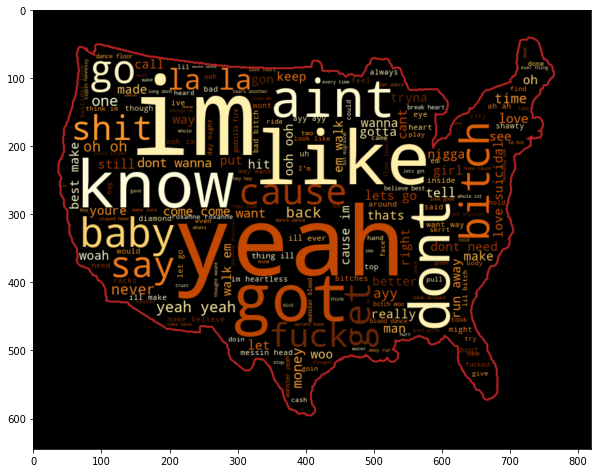

In [85]:
# Creating a word cloud for the US
path = r'D:\AllWomen\_Final Project\Spotify Project\Datasets\Flag Photos'
os.chdir(path)

plt.figure(figsize=(10,10))
usa_english = usa.loc[usa.language == 'en']

usa_mask = np.array(Image.open('US-map-clip.png'))
usa_mask

usa_wc = WordCloud(background_color='black', colormap='YlOrBr', mask=usa_mask,
                   stopwords=nltk.corpus.stopwords.words('english'), contour_width=3, contour_color='firebrick',
                   width=600, height=600).generate(str(usa_english.lyrics.values))

plt.imshow(usa_wc, interpolation='bilinear')

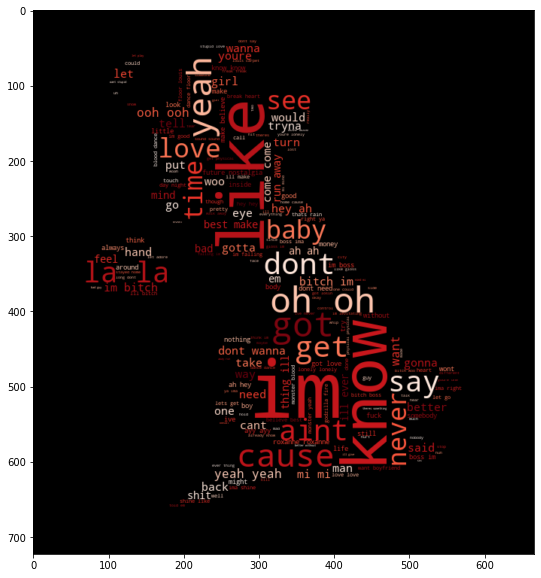

In [86]:
# Creating the UK word cloud 
uk_mask = np.array(Image.open('UK-country-map.png'))
uk_mask

plt.figure(figsize=(10,10))
uk_wc = WordCloud(background_color='black', colormap='Reds', mask=uk_mask,
                  stopwords=nltk.corpus.stopwords.words('english'), 
                  width=600, height=600).generate(str(uk.lyrics.values))

plt.imshow(uk_wc, interpolation='bilinear')    # What the fuck man honestly 

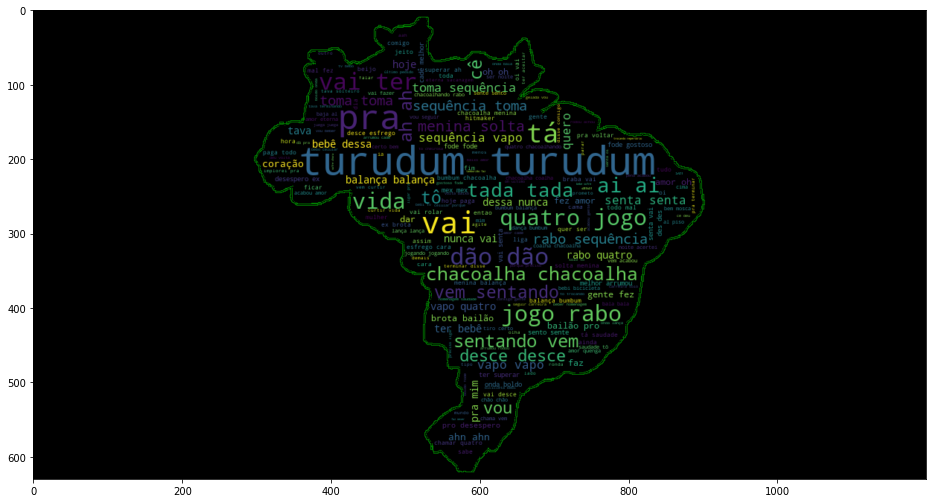

In [88]:
# Portuguese word cloud for Brazil 
brazil_mask = np.array(Image.open('mapBrazil.png'))
brazil_mask

br_portuguese = brazil.loc[brazil.language =='pt']

plt.figure(figsize=(16,16))
brazil_wc = WordCloud(background_color='black', mask=brazil_mask,
                      stopwords=nltk.corpus.stopwords.words('portuguese'), contour_width=0.5, 
                      contour_color='green', width=600, height=600).generate(str(br_portuguese.lyrics.values))

plt.imshow(brazil_wc, interpolation='bilinear')

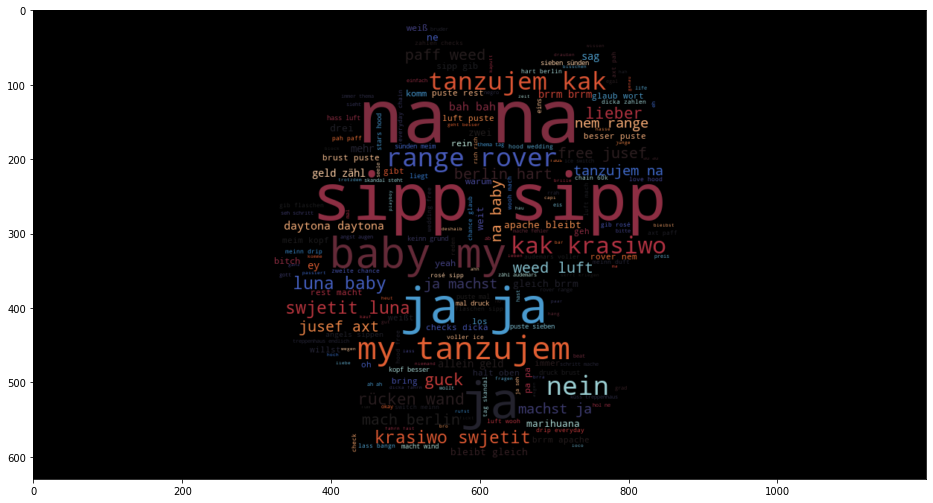

In [89]:
# German word cloud
germany_mask = np.array(Image.open('Germany map.png'))
germany_mask

german = germany.loc[germany.language =='de']

plt.figure(figsize=(16,16))
germany_wc = WordCloud(background_color='black', colormap='icefire', mask=germany_mask,
                       stopwords=nltk.corpus.stopwords.words('german'), 
                       width=600, height=600).generate(str(german.lyrics.values))

plt.imshow(germany_wc, interpolation='bilinear')

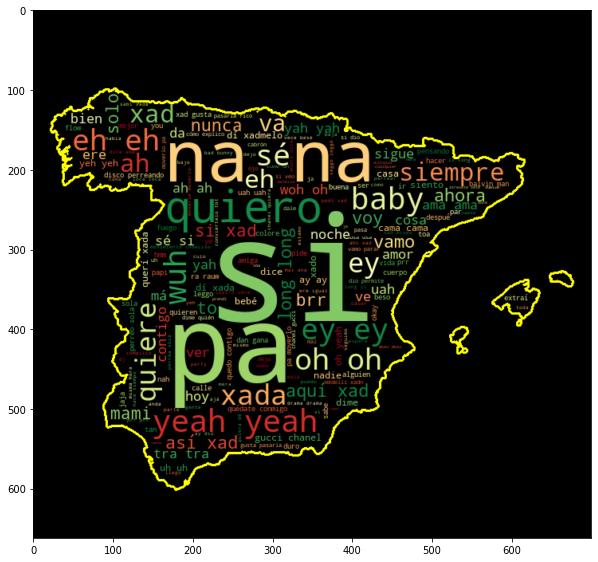

In [92]:
spain_mask = np.array(Image.open('Map_Of_Spain.png'))
spain_mask

esp_spanish = spain.loc[spain.language =='es']

plt.figure(figsize=(10,10))
spain_wc = WordCloud(background_color='black', colormap='RdYlGn', mask=spain_mask,
                     stopwords=nltk.corpus.stopwords.words('spanish'), contour_width=3, 
                     contour_color='yellow', width=600, height=600).generate(str(esp_spanish.lyrics.values))

plt.imshow(spain_wc, interpolation='bilinear')

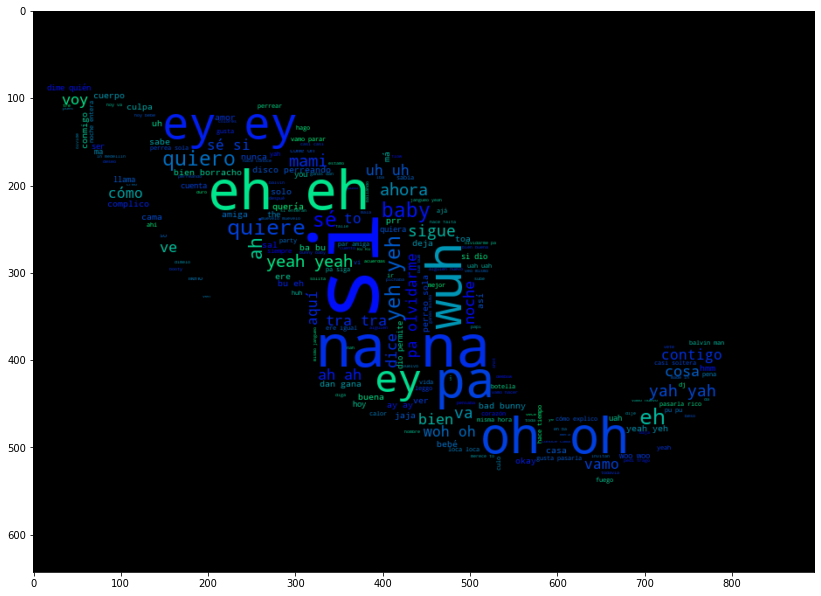

In [93]:
# Spanish word could for Mexico
mexico_mask = np.array(Image.open('Mexico map.png'))
mexico_mask

esp_mexico = mexico.loc[mexico.language =='es']

plt.figure(figsize=(14,12))
spain_wc = WordCloud(background_color='black', colormap='winter', mask=mexico_mask,
                     stopwords=nltk.corpus.stopwords.words('spanish'), 
                     width=600, height=600).generate(str(esp_mexico.lyrics.values))

plt.imshow(spain_wc, interpolation='bilinear')

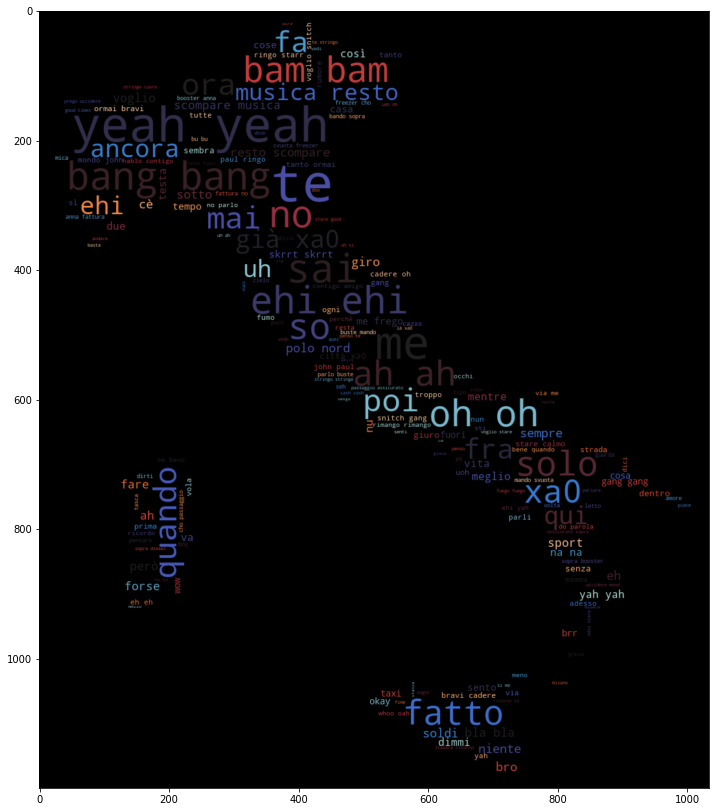

In [94]:
# Italian word cloud 
italy_mask = np.array(Image.open('italy map.png'))
italy_mask

italian = italy.loc[italy.language =='it']

plt.figure(figsize=(12,16))
italy_wc = WordCloud(background_color='black', colormap='icefire', mask=italy_mask,
                     stopwords=nltk.corpus.stopwords.words('italian'), 
                     width=600, height=600).generate(str(italian.lyrics.values))

plt.imshow(italy_wc, interpolation='bilinear')

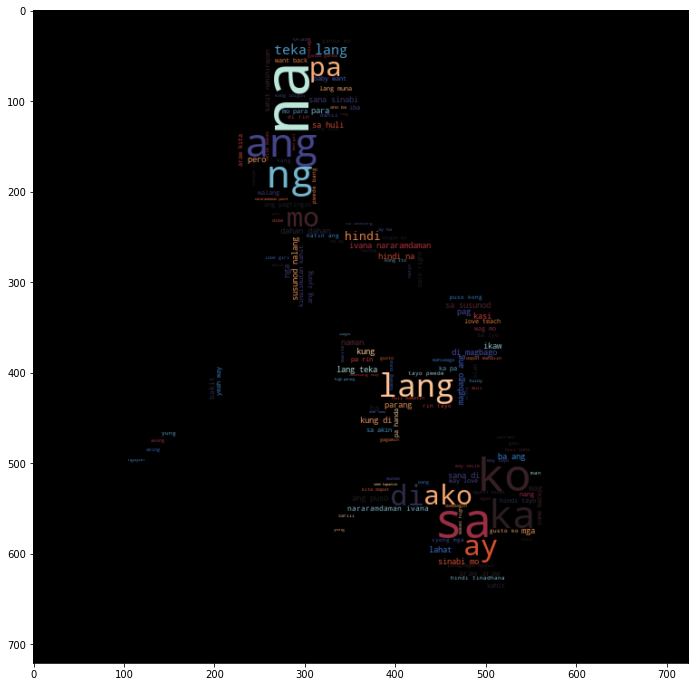

In [95]:
# Filipino word cloud
philippines_mask = np.array(Image.open('philippines map.png'))
philippines_mask

tagalog = philippines.loc[philippines.language =='tl']

plt.figure(figsize=(12,12))
philippines_wc = WordCloud(background_color='black', colormap='icefire', mask=philippines_mask,
                           stopwords=nltk.corpus.stopwords.words('english'), 
                           width=600, height=600).generate(str(tagalog.lyrics.values))

plt.imshow(philippines_wc, interpolation='bilinear')

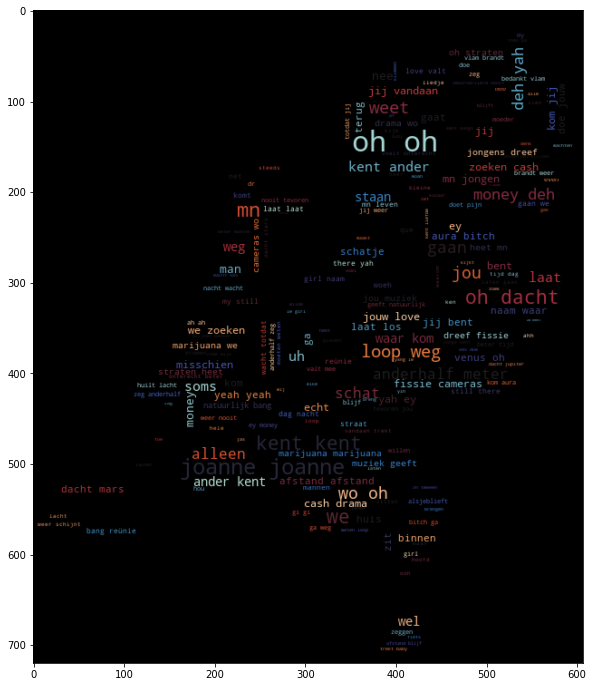

In [97]:
# Dutch word cloud 
netherlands_mask = np.array(Image.open('netherlands2.png'))
netherlands_mask

dutch = netherlands.loc[netherlands.language =='nl']

plt.figure(figsize=(14,12))
netherlands_wc = WordCloud(background_color='black', colormap='icefire', mask=netherlands_mask,
                           stopwords=nltk.corpus.stopwords.words('dutch'), 
                           width=600, height=600).generate(str(dutch.lyrics.values))

plt.imshow(netherlands_wc, interpolation='bilinear')

In this workbook, I have used VADER sentiment analysis to look at the sentiment values for the lyrics in each of the songs in the Global top 500. For most of the songs, the neutral sentiment value was the highest so I decided to look at what was higher the positive or negative values and compare on a cross-country basis the positive and negative values. I then looked at the un-preprocessed text for the official languages of the countries to explore using word clouds. 